#Q2

In [1]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

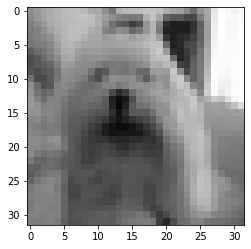

In [4]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [5]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
# Write your code here 
# Add Flatten layer and few Dense layers

fc_model.add(keras.layers.Flatten())
fc_model.add(keras.layers.Dense(units=200,activation='relu'))
fc_model.add(keras.layers.BatchNormalization())
fc_model.add(keras.layers.Dense(units=200,activation='relu'))
fc_model.add(keras.layers.BatchNormalization())
fc_model.add(keras.layers.Dense(units=64,activation='relu'))
fc_model.add(keras.layers.Dense(units=10))


fc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 batch_normalization (BatchN  (None, 200)              800       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                1

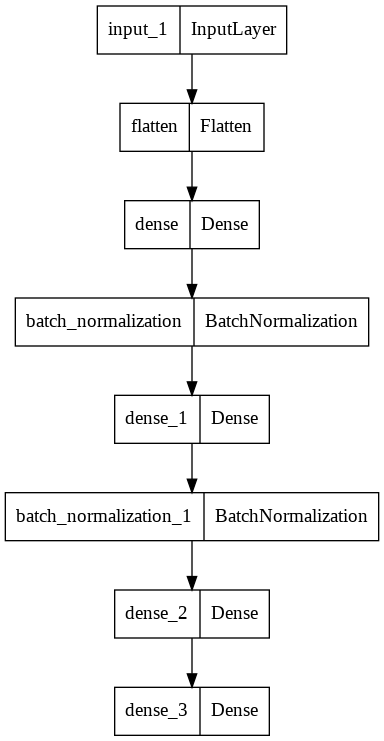

In [7]:
plot_model(fc_model)

In [8]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
# add few Conv layers and Flatten layer

# you can use pool layers after Conv layers
Conv_model.add(keras.layers.Conv2D(filters=40,kernel_size=3))
Conv_model.add(keras.layers.BatchNormalization())
Conv_model.add(keras.layers.ReLU())
Conv_model.add(keras.layers.Conv2D(filters=80,kernel_size=3))
Conv_model.add(keras.layers.BatchNormalization())
Conv_model.add(keras.layers.ReLU())
Conv_model.add(keras.layers.MaxPool2D())

Conv_model.add(keras.layers.Conv2D(filters=120,kernel_size=3))
Conv_model.add(keras.layers.BatchNormalization())
# Conv_model.add(keras.layers.ReLU())
# Conv_model.add(keras.layers.Conv2D(filters=85,kernel_size=3))
# Conv_model.add(keras.layers.BatchNormalization())
Conv_model.add(keras.layers.ReLU())
Conv_model.add(keras.layers.Flatten())
Conv_model.add(keras.layers.Dense(units=10))



Conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 40)        1120      
                                                                 
 batch_normalization_2 (Batc  (None, 30, 30, 40)       160       
 hNormalization)                                                 
                                                                 
 re_lu (ReLU)                (None, 30, 30, 40)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 80)        28880     
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 80)       320       
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 28, 28, 80)       

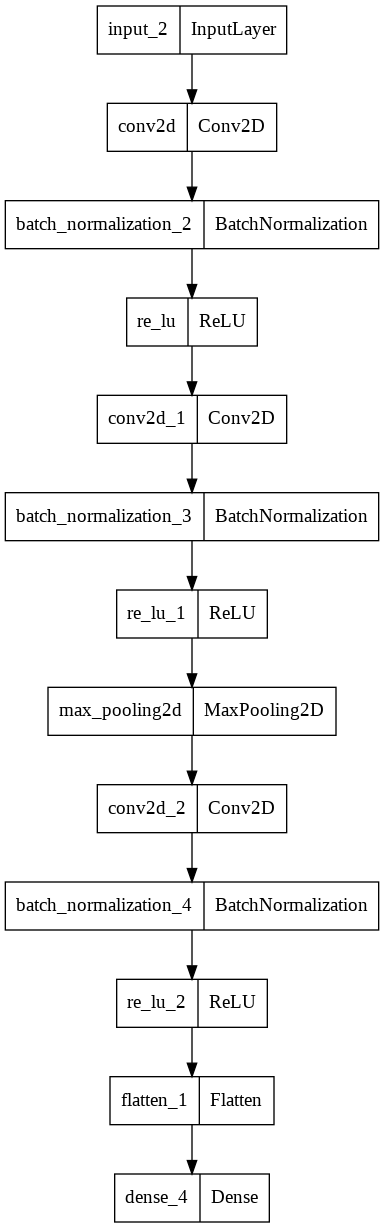

In [9]:
plot_model(Conv_model)

In [10]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=12)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/12
1563/1563 [==============================] - 10s 4ms/step - loss: 7.1829 - accuracy: 0.1173
Epoch 2/12
1563/1563 [==============================] - 7s 4ms/step - loss: 7.6088 - accuracy: 0.1350
Epoch 3/12
1563/1563 [==============================] - 7s 4ms/step - loss: 7.0704 - accuracy: 0.0985
Epoch 4/12
1563/1563 [==============================] - 7s 4ms/step - loss: 7.0682 - accuracy: 0.0870
Epoch 5/12
1563/1563 [==============================] - 7s 4ms/step - loss: 7.5283 - accuracy: 0.0955
Epoch 6/12
1563/1563 [==============================] - 7s 4ms/step - loss: 7.7388 - accuracy: 0.1048
Epoch 7/12
1563/1563 [==============================] - 8s 5ms/step - loss: 7.7478 - accuracy: 0.0902
Epoch 8/12
1563/1563 [==============================] - 7s 4ms/step - loss: 7.1291 - accuracy: 0.0705
Epoch 9/12
1563/1563 [==============================] - 7s 4ms/step - loss: 7.5525 - accuracy: 0.0809
Epoch 10/12
1563/1563 [==============================] - 7s

#Q3

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os 
import matplotlib.pyplot as plt

In [2]:
!rm -r sample_data

In [3]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:14<00:00, 41.1MB/s]


In [4]:
!unzip fruits-360-original-size.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_108.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_110.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_112.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_114.jpg  
  infl

## A : complete resize image

In [5]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [6]:
def resize_img(img, desired_size = 224):
    old_size = img.shape[0:2]
    # print(old_size)
    # write your code here
    ratio = float(desired_size)/max(old_size)
    new_size = [int(x*ratio) for x in old_size[::-1]]
    # print(new_size)

    # new_size.append(img.shape[2])
    
    im = cv2.resize(img.copy(),new_size )
    # print(im.shape)
    # plt.figure()
    # plt.imshow(im)

    # create a new image and paste the resized on it
    z=np.zeros((desired_size,desired_size,img.shape[2]))
    
    z[(desired_size-new_size[1])//2:(desired_size+new_size[1])//2,\
      (desired_size-new_size[0])//2:(desired_size+new_size[0])//2] = im.copy()
   
    # plt.figure()
    # plt.imshow(z[(desired_size-new_size[1])//2:(desired_size+new_size[1])//2,\
    #   (desired_size-new_size[0])//2:(desired_size+new_size[0])//2].astype(np.uint))

    return z.astype(np.float32)

(653, 184, 3)


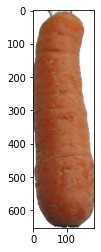

In [7]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
print(img.shape)
plt.imshow(img.astype(np.uint))
plt.show()

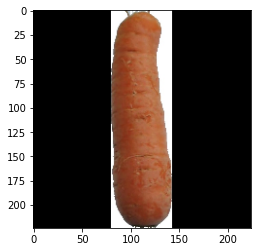

In [8]:
new_img = resize_img(img)
plt.figure()
plt.imshow(new_img.astype(np.uint))

## Image Data generator

In [9]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=64,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weigts

In [10]:
# YOU CAN CHANGE IT
EPOCHS = 30
num_classes=24

In [11]:
resnet = tf.keras.models.Sequential()
# Write your code here
model=tf.keras.applications.resnet50.ResNet50(include_top=False,weights=None,input_shape=(224,224,3),classes=num_classes)
resnet.add(model)
resnet.add(tf.keras.layers.Flatten())
resnet.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))
resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 24)                2408472   
                                                                 
Total params: 25,996,184
Trainable params: 25,943,064
Non-trainable params: 53,120
_________________________________________________________________


In [12]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [ ]:
res_history=resnet.fit(train_generator, epochs=EPOCHS)

Epoch 1/30
65/65 [==============================] - 86s 1s/step - loss: 12.4733 - acc: 0.3078
Epoch 2/30
65/65 [==============================] - 65s 988ms/step - loss: 1.4491 - acc: 0.7867
Epoch 3/30
65/65 [==============================] - 65s 998ms/step - loss: 0.2910 - acc: 0.9491
Epoch 4/30
65/65 [==============================] - 65s 994ms/step - loss: 0.0452 - acc: 0.9897
Epoch 5/30
65/65 [==============================] - 65s 993ms/step - loss: 0.7627 - acc: 0.9498
Epoch 6/30
65/65 [==============================] - 65s 997ms/step - loss: 0.2492 - acc: 0.9677
Epoch 7/30
65/65 [==============================] - 65s 993ms/step - loss: 0.3204 - acc: 0.9668
Epoch 8/30
65/65 [==============================] - 65s 994ms/step - loss: 0.0955 - acc: 0.9864
Epoch 9/30
65/65 [==============================] - 65s 994ms/step - loss: 0.0992 - acc: 0.9883
Epoch 10/30
65/65 [==============================] - 65s 995ms/step - loss: 0.1834 - acc: 0.9823
Epoch 11/30
65/65 [======================

## C : Fine-tune Resnet50 on fruits dataset.

In [20]:
fine_tune_resnet = tf.keras.models.Sequential()
# write your code here 
model=tf.keras.applications.resnet50.ResNet50(include_top=False,weights=None,input_shape=(224,224,3),classes=num_classes)
for l in model.layers:
  l.trainable =False

fine_tune_resnet.add(model)
fine_tune_resnet.add(tf.keras.layers.Flatten())
fine_tune_resnet.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))
fine_tune_resnet.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 24)                2408472   
                                                                 
Total params: 25,996,184
Trainable params: 2,408,472
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [16]:
fine_history=fine_tune_resnet.fit(train_generator, epochs=EPOCHS)

Epoch 1/30
65/65 [==============================] - 37s 529ms/step - loss: 1.7665 - acc: 0.5144
Epoch 2/30
65/65 [==============================] - 35s 533ms/step - loss: 0.7828 - acc: 0.8114
Epoch 3/30
65/65 [==============================] - 34s 522ms/step - loss: 0.5167 - acc: 0.9108
Epoch 4/30
65/65 [==============================] - 35s 532ms/step - loss: 0.3897 - acc: 0.9376
Epoch 5/30
65/65 [==============================] - 35s 531ms/step - loss: 0.3038 - acc: 0.9559
Epoch 6/30
65/65 [==============================] - 35s 531ms/step - loss: 0.2467 - acc: 0.9718
Epoch 7/30
65/65 [==============================] - 35s 529ms/step - loss: 0.2024 - acc: 0.9841
Epoch 8/30
65/65 [==============================] - 35s 528ms/step - loss: 0.1752 - acc: 0.9844
Epoch 9/30
65/65 [==============================] - 34s 527ms/step - loss: 0.1529 - acc: 0.9864
Epoch 10/30
65/65 [==============================] - 34s 525ms/step - loss: 0.1288 - acc: 0.9904
Epoch 11/30
65/65 [====================

## Test models

In [25]:
resnet.evaluate(test_generator)

33/33 [==============================] - 22s 658ms/step - loss: 0.0075 - acc: 0.9971


[0.007530686445534229, 0.99710613489151]

In [26]:
fine_tune_resnet.evaluate(test_generator)



33/33 [==============================] - 18s 535ms/step - loss: 0.0229 - acc: 0.9994


[0.022891851142048836, 0.9993569254875183]

In [29]:

plt.figure()
print(fine_tune_resnet.history.history)

{}


<Figure size 432x288 with 0 Axes>